# DS200: Assignment 
## Module 4: Literature Review and Software Tooling
**Due Date: 5 Dec 2020 at 5:00 PM**

Select datasets from https://data.gov.in/ and create (a) a scatter plot, (b) a box plot, and (c) a bar or line plot from them using mathplotlib library. Upload the plots and the Python scripts you wrote to this repository as a single zip file, and include a Readme.md documentation for the same listing the data sources and the observations from the plots, including citations. Use the git or svncommand line clients to perform these operations.

In [1]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

In [2]:
def Check_file(filename,check=0):
        # initializing the titles and rows list 
        fields = [];rows = [];data = [];i=0;j=0

        # reading csv file 
        with open(filename, 'r') as csvfile: 
            # creating a csv reader object 
            csvreader = csv.reader(csvfile) 
            d_reader = csv.DictReader(filename)
            headers = d_reader.fieldnames 
            # extracting field names through first row 
            state_header = next(csvreader) 
            print(state_header)
            # extracting each data row one by one 
            for row in csvreader: 
                rows.append(row) 
                data.append([])
                for col in row: 
                    data[i].append(col) 
                    j=j+1
                i=i+1
            # get total number of rows 
            n_line=csvreader.line_num
            print("Total no. of rows: %d"%(n_line)) 
        n=csvreader.line_num
        if check==1:
            # printing the field names 
            print('Field names are:' + ', '.join(field for field in fields)) 

            #  printing first 5 rows 
            print('\nFirst 5 rows are:\n')
            for row in rows[:5]: 
                # parsing each column of a row 
                for col in row: 
                    print("%10s"%col), 
                print('\n')
        data=np.array(data)
        return data, np.array(state_header) 
          #data as an array       ## header                      

### Upload data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving datafile.csv to datafile.csv


### Check fiel content 

In [64]:
data,head=Check_file("datafile.csv")

['STATE/UT', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN+FEB', 'MAM', 'JJAS', 'OND']
Total no. of rows: 641


In [133]:
def scatter_plot(region,plot_type=0):
  ba_index =np.where(data[:,1]==region)
  rain=data[ba_index,2:14].astype('Float64')[0]
  rain.tolist() 
  d=np.zeros([2,12]).tolist()
  d[0,:]=np.linspace(1,12,12);d[1,:]=rain
  if plot_type==0:
   plt.scatter(d[0,:],d[1,:])
  else:
    plt.plot(d[0,:],d[1,:])
  plt.plot(np.linspace(1,12,12),rain)
  plt.xticks(d[0,:],head[2:14], rotation =75)
  plt.title("Rainfall in "+region+' from 1951-2020')
  plt.ylabel("rainfall in mm")

## SCATTER PLOT

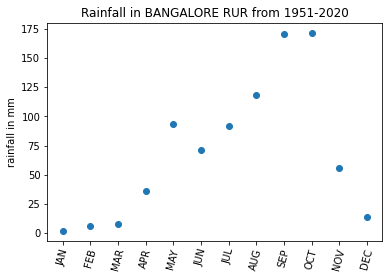

In [132]:
scatter_line_plot('BANGALORE RUR')

## LINE PLOT

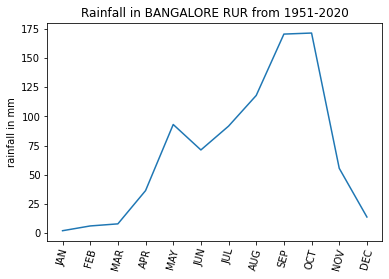

In [134]:
scatter_line_plot('BANGALORE RUR',1)

## BOX PLOT

In [93]:
def box_plot(State): 
  state_index =np.where(data[:,0]==State)
  mon_data=[]
  for i in range(2,14):
    mon_data.append(data[state_index,i].astype('Float64')[0])

  fig, ax1 = plt.subplots(figsize=(10, 6))
  fig.canvas.set_window_title('A Boxplot Example')
  fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

  bp = ax1.boxplot(mon_data, notch=0, sym='+', vert=1, whis=1.5)
  plt.setp(bp['boxes'], color='black')
  plt.setp(bp['whiskers'], color='black')
  plt.setp(bp['fliers'], color='red', marker='+')

  # Add a horizontal grid to the plot, but make it very light in color
  # so we can use it for reading data values but not be distracting
  ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                alpha=0.5)

  # Hide these grid behind plot objects
  ax1.set_axisbelow(True)
  ax1.set_title('Monthly average Rainfall across '+State+' from 1951-2020')
  ax1.set_xlabel('month')
  ax1.set_ylabel('Rainfall in mm')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


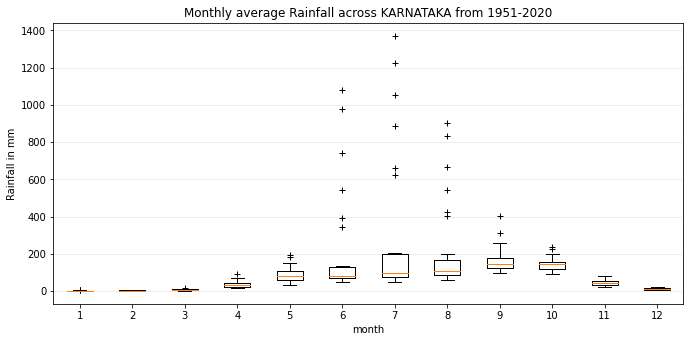

In [94]:
box_plot('KARNATAKA')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


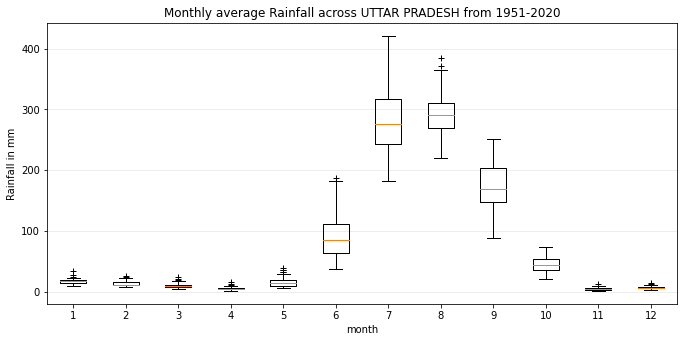

In [95]:
box_plot('UTTAR PRADESH')